In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.io as sio
import copy
import pandas as pd
import time
import psutil
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO
from pylab import *
import pylab
#pd.set_option('display.mpl_style','default')
%matplotlib notebook
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['animation.html'] = 'jshtml'
from tkinter import * 
import time,random

In [2]:
def arduino():
    import serial
    import time
    ser = serial.Serial('COM5', 9600, timeout=1)
    def led_on_8():
        ser.write(b'1') # write(b'1')
    def led_off_8():
        ser.write(b'2') # write(b'0')
    def led_on_9():
        ser.write(b'3') # write(b'0')
    def led_off_9():
        ser.write(b'4') # write(b'0')
    def led_on_10():
        ser.write(b'5') # write(b'0')
    def led_off_10():
        ser.write(b'6') # write(b'0')

In [1]:
from tkinter import * 
import time,random

Window = Tk()
Window.title("Reach Analysis App") 
Window.configure(background='black')
Counter = 0

def reaction_function():
    global Counter 
    Counter = Counter + 1
    ## Time Span function
    label.config(text=Counter)
    Button1.config(bg = "deep pink")  #red2 OrangeRed2
#     print("your reaction time is ", Counter)
def reaction_function2():
    global Counter 
    Counter = Counter + 1
    label.config(text=Counter)
    Button2.config(bg = "deep pink")
#     print("your reaction time is ", Counter)
def reaction_function3():
    global Counter 
    Counter = Counter + 1
    label.config(text=Counter)
    Button3.config(bg = "deep pink")
#     print("your reaction time is ", Counter)
def reaction_function4():
    global Counter 
    Counter = Counter + 1
    label.config(text=Counter)
    Button4.config(bg = "deep pink")
#     print("your reaction time is ", Counter)
def select_function():
    global Counter 
    Button1.config(bg = "red2")  #red2 OrangeRed2
def select_function2():
    global Counter 
    Button2.config(bg = "red2")  #red2 OrangeRed2
def select_function3():
    global Counter 
    Button3.config(bg = "red2")  #red2 OrangeRed2
def select_function4():
    global Counter 
    Button4.config(bg = "red2")  #red2 OrangeRed2

label2 = Label(Window, text="Test your reaction time :",font=("Helvetica", 26),fg="white",bg="black")
label = Label(Window, text="Time Taken",font=("Helvetica", 26),fg="red")
Button1= Button(Window,bg="lawn green",text="Touch if Red",font=("Helvetica", 26),fg="white",command=reaction_function)
Button2= Button(Window,bg="lawn green",text="Touch if Red",font=("Helvetica", 26),fg="white",command=reaction_function2)
Button3= Button(Window,bg="lawn green",text="Touch if Red",font=("Helvetica", 26),fg="white",command=reaction_function3)
Button4= Button(Window,bg="lawn green",text="Touch if Red",font=("Helvetica", 26),fg="white",command=reaction_function4)

tk_var = StringVar()
tk_var.set("0")
label4 = Label(Window, textvariable=tk_var, font=("Helvetica", 34),fg="white",bg="black")
# label4.place(x=525, y=250)    #Center
label4.pack()  #default is center  #side=TOP

# label2.place(x=430, y=250)
label2.place(x=400, y=250)
# label.place(x=525, y=300)
label.place(x=780, y=250)
Button1.place(x=20, y=120)
Button2.place(x=940, y=120)
Button3.place(x=20, y=620)
Button4.place(x=940, y=620)
Window.geometry("1200x800+200-60")
#####
# label4=Label(Window, textvariable=tk_var,bg='#40E0D0', fg='#FF0000')
# label4.place(x=20, y=30)
ctr = 0

def updater():
    global ctr
    global ind
#     ctr = ctr + 1
#     tk_var.set("When i say Go")
    if ctr == 0:
        tk_var.set("When i say Go.")
        ctr = ctr + 1
        Window.after(2000,updater)
    elif ctr == 1:
        tk_var.set("When u see the red light, u touch it.")
        ctr = ctr + 1

        Window.after(2000,updater)
    elif ctr==2:
        tk_var.set("Got that? k")
        ctr = ctr + 1
        Window.after(2000,updater)
    elif ctr==3:
#         %run -i new_phase-Copy3live-Copy5.ipynb 
#       %run -i test_run.ipynb   #test program
        tk_var.set("Go !!!")
    
        lst = [select_function,select_function2,select_function3,select_function4]
#         print(lst)
#         ind=random.randint(1,4)
#         a = random.choice(lst)()
        
        ind=random.randint(0,3)
        lst[ind]()
#         quit()    
#         return ind
#   %run -i new_phase-Copy3live-Copy5.ipynb   
#   Window.after(updater)
updater()

In [3]:
######
def interf():
    Window.mainloop()
    # print(ind)
    global pos
    global ind
    if ind==0:
        pos = "upper-left"
    elif ind==1:
        pos = "upper-right"
    elif ind==2:
        pos = "lower-left"
    elif ind==3:
        pos = "lower-right"
    return ind,pos
# print(pos)

In [5]:
##Run Interface Functions 
#interf()

(3, 'lower-right')

In [1]:
def sensors(n,arduino_out):
    # plot the signal
    #
    plt.style.use('ggplot')
    %matplotlib notebook
    plt.rcParams['figure.figsize'] = (18, 24)
    fig = plt.figure()
    #plt.style.use('dark_background')
    fig.patch.set_facecolor('black')
    fig.patch.set_alpha(0.5)
    ctime0 = 0
    #grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
    #fig= plt.subplots(facecolor='lightslategray')
    #fig = plt.figure()
    # fig.show()
    global x1,y1,v1,a1,x2,y2,v2,a2,x3,y3,v3,a3,x4,y4,v4,a4,x5,y5,v5,a5,x6,y6,v6,a6,x7,y7,v7,a7,x8,y8,v8,a8,x9,y9,v9,a9
    
    if n == 3:
        i1,z1 = 0,0
        x1, y1,v1,a1 = [],[],[],[]

        i2,z2 = 0,0
        x2, y2,v2,a2 = [],[],[],[]

        i3,z3 = 0,0
        x3, y3,v3,a3 = [],[],[],[]

        i4,z4 = 0,0
        x4, y4,v4,a4 = [],[],[],[]

        i5,z5 = 0,0
        x5, y5,v5,a5 = [],[],[],[]

        i6,z6 = 0,0
        x6, y6,v6,a6 = [],[],[],[]

        i7,z7 = 0,0
        x7, y7,v7,a7 = [],[],[],[]

        i8,z8 = 0,0
        x8, y8,v8,a8 = [],[],[],[]

        i9,z9 = 0,0
        x9, y9,v9,a9 = [],[],[],[]

        while True:
                #####
            ctime = psutil.cpu_percent()
            x1.append(i1)
            y1.append(ctime)
            # calc velocity and acceleration
            if i1!=0:
                v_1 = abs((ctime -ctime0)/0.1)
                v1.append(v_1)
                a_1 = abs((v_1-v01)/0.1)
                a1.append(a_1)
                #Arduino thing
#                 global arduino_out
                if arduino_out=="yes":
                    arduino()   
                    if a_1>=400 and a_1<=600:
                        led_on_9()
                        led_off_8()
                        led_off_10()
                    elif a_1>=0 and a_1<399:
                        led_off_9()
                        led_on_8()
                        led_off_10()
                    elif a_1>600:
                        led_off_9()
                        led_off_8()
                        led_on_10()
            elif i1==0:
                v_1=0
                a_1=0
                v1.append(0)
                a1.append(0)
            # ending calc velocity and accceleration
        #   print('ctimes',ctime,ctime0,'vel',v,'accel',a)  #Check if calc is ok, initial displ and final displa
        #   ctime is current dispacement time step n and ctime0 is previous dispacement in time step(n-1)
            subplot(n*3,1,1)
            ax = plt.gca()
            ax.set_xlim([0,x1[i1]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
            global time_series11,time_series12,moving_av13 
            time_series11 = pd.DataFrame(y1).rolling(3).mean()
            time_series12 = pd.DataFrame(y1).rolling(20).mean()
            moving_av13 = time_series11/time_series12

            ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,x-axis')
            # place legend only in 1st iteration
            if i1==0:
                plt.legend(loc='upper right')
            #####
            x2.append(i2)
        #    ctime = psutil.cpu_percent()
        #     ctime = 3*ctime
            y2.append(ctime)
            # calc velocity and acceleration
            if i2!=0:
                v_2 = abs((ctime -ctime0)/0.1)
                v2.append(v_2)
                a_2 = abs((v_2-v02)/0.1)
                a2.append(a_2)
            elif i2==0:
                v_2=0
                a_2=0
                v2.append(0)
                a2.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,2)
            ax = plt.gca()
            ax.set_xlim([0,x2[i2]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')
            global time_series21,time_series22,moving_av23
            time_series21 = pd.DataFrame(y2).rolling(3).mean()
            time_series22 = pd.DataFrame(y2).rolling(20).mean()
            moving_av23 = time_series21/time_series22

            ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,y-axis')
            # place legend only in 1st iteration
            if i2==0:
                plt.legend(loc='upper right')
            #####
            x3.append(i3)
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y3.append(ctime)
            # calc velocity and acceleration
            if i3!=0:
                v_3 = abs((ctime -ctime0)/0.1)
                v3.append(v_3)
                a_3 = abs((v_3-v03)/0.1)
                a3.append(a_3)
            elif i3==0:
                v_3=0
                a_3=0
                v3.append(0)
                a3.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,3)
            ax = plt.gca()
            ax.set_xlim([0,x3[i3]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')
            global time_series31,time_series32,moving_av33
            time_series31 = pd.DataFrame(y3).rolling(3).mean()
            time_series32 = pd.DataFrame(y3).rolling(20).mean()
            moving_av33 = time_series31/time_series32

            ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,z-axis')
            # place legend only in 1st iteration
            if i3==0:
                plt.legend(loc='upper right')
            #####
            x4.append(i4)
        #     ctime = psutil.cpu_percent()
        #     ctime = np.array(psutil.cpu_percent())
        #     ctime = 1*ctime
            y4.append(ctime)
        #     ctime is taken as dispacement, time.sleep(0.1) 0.1 is the frequency time period
            # calc velocity and acceleration
            if i4!=0:
                v_4 = abs((ctime -ctime0)/0.1)
                v4.append(v_4)
                a_4 = abs((v_4-v04)/0.1)
                a4.append(a_4)
            elif i4==0:
                v_4=0
                a_4=0
                v4.append(0)
                a4.append(0)
            # ending calc velocity and accceleration
        #   print('ctimes',ctime,ctime0,'vel',v,'accel',a)  #Check if calc is ok, initial displ and final displa
        #   ctime is current dispacement time step n and ctime0 is previous dispacement in time step(n-1)
            subplot(n*3,1,4)
            ax = plt.gca()
            ax.set_xlim([0,x4[i4]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')
            global time_series41,time_series42,moving_av43
            time_series41 = pd.DataFrame(y4).rolling(3).mean()
            time_series42 = pd.DataFrame(y4).rolling(20).mean()
            moving_av43 = time_series41/time_series42

            ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-2,x-axis')
            # place legend only in 1st iteration
            if i4==0:
                plt.legend(loc='upper right')
            #####
            #####
            x5.append(i5)
        #    ctime = psutil.cpu_percent()
        #     ctime = 3*ctime
            y5.append(ctime)
            # calc velocity and acceleration
            if i5!=0:
                v_5 = abs((ctime -ctime0)/0.1)
                v5.append(v_5)
                a_5 = abs((v_5-v05)/0.1)
                a5.append(a_5)
            elif i5==0:
                v_5=0
                a_5=0
                v5.append(0)
                a5.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,5)
            ax = plt.gca()
            ax.set_xlim([0,x5[i5]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')
            global time_series51,time_series52,moving_av53
            time_series51 = pd.DataFrame(y5).rolling(3).mean()
            time_series52 = pd.DataFrame(y5).rolling(20).mean()
            moving_av53 = time_series51/time_series52

            ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-2,y-axis')
            # place legend only in 1st iteration
            if i5==0:
                plt.legend(loc='upper right')
            #####
            x6.append(i6)
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y6.append(ctime)
            # calc velocity and acceleration
            if i6!=0:
                v_6 = abs((ctime -ctime0)/0.1)
                v6.append(v_6)
                a_6 = abs((v_6-v06)/0.1)
                a6.append(a_6)
            elif i6==0:
                v_6=0
                a_6=0
                v6.append(0)
                a6.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,6)
            ax = plt.gca()
            ax.set_xlim([0,x6[i6]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
            global time_series61,time_series62,moving_av63
            time_series61 = pd.DataFrame(y6).rolling(3).mean()
            time_series62 = pd.DataFrame(y6).rolling(20).mean()
            moving_av63 = time_series61/time_series62

            ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-2,z-axis')
            # place legend only in 1st iteration
            if i6==0:
                plt.legend(loc='upper right')
            ######
            ##### new addidtional 3 plots
            x7.append(i7)
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y7.append(ctime)
            # calc velocity and acceleration
            if i7!=0:
                v_7 = abs((ctime -ctime0)/0.1)
                v7.append(v_7)
                a_7 = abs((v_7-v07)/0.1)
                a7.append(a_7)
            elif i7==0:
                v_7=0
                a_7=0
                v7.append(0)
                a7.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,7)
            ax = plt.gca()
            ax.set_xlim([0,x7[i7]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x7, y7, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x7,'Voltage':(y7),}).set_index('Time')
            global time_series71,time_series72,moving_av73
            time_series71 = pd.DataFrame(y7).rolling(3).mean()
            time_series72 = pd.DataFrame(y7).rolling(20).mean()
            moving_av73 = time_series71/time_series72

            ax.plot(x7, time_series71,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x7, time_series72, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x7, moving_av73, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-3,x-axis')  
            # place legend only in 1st iteration
            if i7==0:
                plt.legend(loc='upper right')
            #####
            x8.append(i8)
        #    ctime = psutil.cpu_percent()
        #     ctime = 3*ctime
            y8.append(ctime)
            # calc velocity and acceleration
            if i8!=0:
                v_8 = abs((ctime -ctime0)/0.1)
                v8.append(v_8)
                a_8 = abs((v_8-v08)/0.1)
                a8.append(a_8)
            elif i8==0:
                v_8=0
                a_8=0
                v8.append(0)
                a8.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,8)
            ax = plt.gca()
            ax.set_xlim([0,x8[i8]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x8, y8,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x8,'Voltage':(y8),}).set_index('Time')
            global time_series81,time_series82,moving_av83
            time_series81 = pd.DataFrame(y8).rolling(3).mean()
            time_series82 = pd.DataFrame(y8).rolling(20).mean()
            moving_av83 = time_series81/time_series82

            ax.plot(x8, time_series81,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x8, time_series82,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x8, moving_av83,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-3,y-axis')
            # place legend only in 1st iteration
            if i8==0:
                plt.legend(loc='upper right')
            #####
            x9.append(i9)
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y9.append(ctime)
            # calc velocity and acceleration
            if i9!=0:
                v_9 = abs((ctime -ctime0)/0.1)
                v9.append(v_9)
                a_9 = abs((v_9-v09)/0.1)
                a9.append(a_9)
            elif i9==0:
                v_9=0
                a_9=0
                v9.append(0)
                a9.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,9)
            ax = plt.gca()
            ax.set_xlim([0,x9[i9]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x9, y9, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x9,'Voltage':(y9),}).set_index('Time')
            global time_series91,time_series92,moving_av93
            time_series91 = pd.DataFrame(y9).rolling(3).mean()
            time_series92 = pd.DataFrame(y9).rolling(20).mean()
            moving_av93 = time_series91/time_series92

            ax.plot(x9, time_series91,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x9, time_series92, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x9, moving_av93, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-3,z-axis')
            # place legend only in 1st iteration
            if i9==0:
                plt.legend(loc='upper right')
            #####
        ###############    
            fig.canvas.draw()
            #ax.set_xlim(left=max(0, i-50), right=i+50)
            time.sleep(0.1)
            ctime0 = ctime
            v01 = v_1
            v02 = v_2
            v03 = v_3
            v04 = v_4
            v05 = v_5
            v06 = v_6
            v07 = v_7
            v08 = v_8
            v09 = v_9

            #a = time.sleep(0.05)
        #    print(psutil.cpu_percent())
            #print(x[i]*0.001)
        #     if psutil.cpu_percent()>40:
        #         #print('Trigger 1')
        #         z = z + 1
        #         print(z)
            i1 += 1
            i2 += 1
            i3 += 1
            i4 += 1
            i5 += 1
            i6 += 1
            i7 += 1
            i8 += 1
            i9 += 1  
            
    elif n==2:
#         global x1,y1,v1,a1,x2,y2,v2,a2,x3,y3,v3,a3,x4,y4,v4,a4,x5,y5,v5,a5,x6,y6,v6,a6
        i1,z1 = 0,0
        x1, y1,v1,a1 = [],[],[],[]

        i2,z2 = 0,0
        x2, y2,v2,a2 = [],[],[],[]

        i3,z3 = 0,0
        x3, y3,v3,a3 = [],[],[],[]

        i4,z4 = 0,0
        x4, y4,v4,a4 = [],[],[],[]

        i5,z5 = 0,0
        x5, y5,v5,a5 = [],[],[],[]

        i6,z6 = 0,0
        x6, y6,v6,a6 = [],[],[],[]
        #         i7,z7 = 0,0
        #         x7, y7,v7,a7 = [],[],[],[]
        #         i8,z8 = 0,0
        #         x8, y8,v8,a8 = [],[],[],[]
        #         i9,z9 = 0,0
        #         x9, y9,v9,a9 = [],[],[],[]
        while True:
                #####
            ctime = psutil.cpu_percent()
            x1.append(i1)
            y1.append(ctime)
            # calc velocity and acceleration
            if i1!=0:
                v_1 = abs((ctime -ctime0)/0.1)
                v1.append(v_1)
                a_1 = abs((v_1-v01)/0.1)
                a1.append(a_1)
               
                #Arduino thing
#                 global arduino_out
                if arduino_out=="yes":
                    arduino()   
                    if a_1>=400 and a_1<=600:
                        led_on_9()
                        led_off_8()
                        led_off_10()
                    elif a_1>=0 and a_1<399:
                        led_off_9()
                        led_on_8()
                        led_off_10()
                    elif a_1>600:
                        led_off_9()
                        led_off_8()
                        led_on_10()
            elif i1==0:
                v_1=0
                a_1=0
                v1.append(0)
                a1.append(0)
            # ending calc velocity and accceleration
        #   print('ctimes',ctime,ctime0,'vel',v,'accel',a)  #Check if calc is ok, initial displ and final displa
        #   ctime is current dispacement time step n and ctime0 is previous dispacement in time step(n-1)
            subplot(n*3,1,1)
            ax = plt.gca()
            ax.set_xlim([0,x1[i1]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
            time_series11 = pd.DataFrame(y1).rolling(3).mean()
            time_series12 = pd.DataFrame(y1).rolling(20).mean()
            moving_av13 = time_series11/time_series12

            ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,x-axis')
            # place legend only in 1st iteration
            if i1==0:
                plt.legend(loc='upper right')
            #####
            x2.append(i2)
        #    ctime = psutil.cpu_percent()
        #     ctime = 3*ctime
            y2.append(ctime)
            # calc velocity and acceleration
            if i2!=0:
                v_2 = abs((ctime -ctime0)/0.1)
                v2.append(v_2)
                a_2 = abs((v_2-v02)/0.1)
                a2.append(a_2)
            elif i2==0:
                v_2=0
                a_2=0
                v2.append(0)
                a2.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,2)
            ax = plt.gca()
            ax.set_xlim([0,x2[i2]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')
            time_series21 = pd.DataFrame(y2).rolling(3).mean()
            time_series22 = pd.DataFrame(y2).rolling(20).mean()
            moving_av23 = time_series21/time_series22

            ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,y-axis')
            # place legend only in 1st iteration
            if i2==0:
                plt.legend(loc='upper right')
            #####
            x3.append(i3)
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y3.append(ctime)
            # calc velocity and acceleration
            if i3!=0:
                v_3 = abs((ctime -ctime0)/0.1)
                v3.append(v_3)
                a_3 = abs((v_3-v03)/0.1)
                a3.append(a_3)
            elif i3==0:
                v_3=0
                a_3=0
                v3.append(0)
                a3.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,3)
            ax = plt.gca()
            ax.set_xlim([0,x3[i3]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')
            time_series31 = pd.DataFrame(y3).rolling(3).mean()
            time_series32 = pd.DataFrame(y3).rolling(20).mean()
            moving_av33 = time_series31/time_series32

            ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,z-axis')
            # place legend only in 1st iteration
            if i3==0:
                plt.legend(loc='upper right')
            #####
            x4.append(i4)
        #     ctime = psutil.cpu_percent()
        #     ctime = np.array(psutil.cpu_percent())
        #     ctime = 1*ctime
            y4.append(ctime)
        #     ctime is taken as dispacement, time.sleep(0.1) 0.1 is the frequency time period
            # calc velocity and acceleration
            if i4!=0:
                v_4 = abs((ctime -ctime0)/0.1)
                v4.append(v_4)
                a_4 = abs((v_4-v04)/0.1)
                a4.append(a_4)
            elif i4==0:
                v_4=0
                a_4=0
                v4.append(0)
                a4.append(0)
            # ending calc velocity and accceleration
        #   print('ctimes',ctime,ctime0,'vel',v,'accel',a)  #Check if calc is ok, initial displ and final displa
        #   ctime is current dispacement time step n and ctime0 is previous dispacement in time step(n-1)
            subplot(n*3,1,4)
            ax = plt.gca()
            ax.set_xlim([0,x4[i4]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')
            time_series41 = pd.DataFrame(y4).rolling(3).mean()
            time_series42 = pd.DataFrame(y4).rolling(20).mean()
            moving_av43 = time_series41/time_series42

            ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-2,x-axis')
            # place legend only in 1st iteration
            if i4==0:
                plt.legend(loc='upper right')
            #####
            #####
            x5.append(i5)
        #    ctime = psutil.cpu_percent()
        #     ctime = 3*ctime
            y5.append(ctime)
            # calc velocity and acceleration
            if i5!=0:
                v_5 = abs((ctime -ctime0)/0.1)
                v5.append(v_5)
                a_5 = abs((v_5-v05)/0.1)
                a5.append(a_5)
            elif i5==0:
                v_5=0
                a_5=0
                v5.append(0)
                a5.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,5)
            ax = plt.gca()
            ax.set_xlim([0,x5[i5]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')
            time_series51 = pd.DataFrame(y5).rolling(3).mean()
            time_series52 = pd.DataFrame(y5).rolling(20).mean()
            moving_av53 = time_series51/time_series52

            ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-2,y-axis')
            # place legend only in 1st iteration
            if i5==0:
                plt.legend(loc='upper right')
            #####
            x6.append(i6)
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y6.append(ctime)
            # calc velocity and acceleration
            if i6!=0:
                v_6 = abs((ctime -ctime0)/0.1)
                v6.append(v_6)
                a_6 = abs((v_6-v06)/0.1)
                a6.append(a_6)
            elif i6==0:
                v_6=0
                a_6=0
                v6.append(0)
                a6.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,6)
            ax = plt.gca()
            ax.set_xlim([0,x6[i6]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
            time_series61 = pd.DataFrame(y6).rolling(3).mean()
            time_series62 = pd.DataFrame(y6).rolling(20).mean()
            moving_av63 = time_series61/time_series62

            ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-2,z-axis')
            # place legend only in 1st iteration
            if i6==0:
                plt.legend(loc='upper right')
            ######
        #             ##### new addidtional 3 plots
        #             x7.append(i7)
        #         #    ctime = psutil.cpu_percent()
        #         #     ctime = 0.7*ctime
        #             y7.append(ctime)
        #             # calc velocity and acceleration
        #             if i7!=0:
        #                 v_7 = abs((ctime -ctime0)/0.1)
        #                 v7.append(v_7)
        #                 a_7 = abs((v_7-v07)/0.1)
        #                 a7.append(a_7)
        #             elif i7==0:
        #                 v_7=0
        #                 a_7=0
        #                 v7.append(0)
        #                 a7.append(0)
        #             # ending calc velocity and accceleration
        #             subplot(9,1,7)
        #             ax = plt.gca()
        #             ax.set_xlim([0,x7[i7]])
        #         #     ax.set_ylim([0,40])
        #             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        #             ax.plot(x7, y7, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        #             df = pd.DataFrame({'Time':x7,'Voltage':(y7),}).set_index('Time')
        #             time_series71 = pd.DataFrame(y7).rolling(3).mean()
        #             time_series72 = pd.DataFrame(y7).rolling(20).mean()
        #             moving_av73 = time_series71/time_series72

        #             ax.plot(x7, time_series71,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        #             ax.plot(x7, time_series72, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        #             ax.plot(x7, moving_av73, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        #             plt.xlabel('T(s)')
        #             plt.ylabel('D(m)')
        #             plt.title('z-axis')  
        #             # place legend only in 1st iteration
        #             if i7==0:
        #                 plt.legend(loc='upper right')
        #             #####
        #             x8.append(i8)
        #         #    ctime = psutil.cpu_percent()
        #         #     ctime = 3*ctime
        #             y8.append(ctime)
        #             # calc velocity and acceleration
        #             if i8!=0:
        #                 v_8 = abs((ctime -ctime0)/0.1)
        #                 v8.append(v_8)
        #                 a_8 = abs((v_8-v08)/0.1)
        #                 a8.append(a_8)
        #             elif i8==0:
        #                 v_8=0
        #                 a_8=0
        #                 v8.append(0)
        #                 a8.append(0)
        #             # ending calc velocity and accceleration
        #             subplot(9,1,8)
        #             ax = plt.gca()
        #             ax.set_xlim([0,x8[i8]])
        #         #     ax.set_ylim([0,40])
        #             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        #             ax.plot(x8, y8,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        #             df = pd.DataFrame({'Time':x8,'Voltage':(y8),}).set_index('Time')
        #             time_series81 = pd.DataFrame(y8).rolling(3).mean()
        #             time_series82 = pd.DataFrame(y8).rolling(20).mean()
        #             moving_av83 = time_series81/time_series82

        #             ax.plot(x8, time_series81,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        #             ax.plot(x8, time_series82,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        #             ax.plot(x8, moving_av83,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        #             plt.xlabel('T(s)')
        #             plt.ylabel('D(m)')
        #             plt.title('y-axis')
        #             # place legend only in 1st iteration
        #             if i8==0:
        #                 plt.legend(loc='upper right')
        #             #####
        #             x9.append(i9)
        #         #    ctime = psutil.cpu_percent()
        #         #     ctime = 0.7*ctime
        #             y9.append(ctime)
        #             # calc velocity and acceleration
        #             if i9!=0:
        #                 v_9 = abs((ctime -ctime0)/0.1)
        #                 v9.append(v_9)
        #                 a_9 = abs((v_9-v09)/0.1)
        #                 a9.append(a_9)
        #             elif i9==0:
        #                 v_9=0
        #                 a_9=0
        #                 v9.append(0)
        #                 a9.append(0)
        #             # ending calc velocity and accceleration
        #             subplot(9,1,9)
        #             ax = plt.gca()
        #             ax.set_xlim([0,x9[i9]])
        #         #     ax.set_ylim([0,40])
        #             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        #             ax.plot(x9, y9, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        #             df = pd.DataFrame({'Time':x9,'Voltage':(y9),}).set_index('Time')
        #             time_series91 = pd.DataFrame(y9).rolling(3).mean()
        #             time_series92 = pd.DataFrame(y9).rolling(20).mean()
        #             moving_av93 = time_series91/time_series92

        #             ax.plot(x9, time_series91,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        #             ax.plot(x9, time_series92, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        #             ax.plot(x9, moving_av93, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        #             plt.xlabel('T(s)')
        #             plt.ylabel('D(m)')
        #             plt.title('z-axis')
        #             # place legend only in 1st iteration
        #             if i9==0:
        #                 plt.legend(loc='upper right')
        #             #####
        #         ###############    
            fig.canvas.draw()
            #ax.set_xlim(left=max(0, i-50), right=i+50)
            time.sleep(0.1)
            ctime0 = ctime
            v01 = v_1
            v02 = v_2
            v03 = v_3
            v04 = v_4
            v05 = v_5
            v06 = v_6

            #a = time.sleep(0.05)
        #    print(psutil.cpu_percent())
            #print(x[i]*0.001)
        #     if psutil.cpu_percent()>40:
        #         #print('Trigger 1')
        #         z = z + 1
        #         print(z)
            i1 += 1
            i2 += 1
            i3 += 1
            i4 += 1
            i5 += 1
            i6 += 1
            
    elif n==1:
#         global x1,y1,v1,a1,x2,y2,v2,a2,x3,y3,v3,a3
        i1,z1 = 0,0
        x1, y1,v1,a1 = [],[],[],[]

        i2,z2 = 0,0
        x2, y2,v2,a2 = [],[],[],[]

        i3,z3 = 0,0
        x3, y3,v3,a3 = [],[],[],[]

#         i4,z4 = 0,0
#         x4, y4,v4,a4 = [],[],[],[]

#         i5,z5 = 0,0
#         x5, y5,v5,a5 = [],[],[],[]

#         i6,z6 = 0,0
#         x6, y6,v6,a6 = [],[],[],[]
        #         i7,z7 = 0,0
        #         x7, y7,v7,a7 = [],[],[],[]
        #         i8,z8 = 0,0
        #         x8, y8,v8,a8 = [],[],[],[]
        #         i9,z9 = 0,0
        #         x9, y9,v9,a9 = [],[],[],[]
        p  = Popen('sample.exe',stdout=PIPE, stderr=STDOUT, shell=True)
        while True:
            i = p.stdout.readline()
            if not i: break
#           print(i)
            ####Start
            j = list(filter(None,(i.decode('utf-8')).split(' ')))  # print('DataFrame',j[0],'Markers:   ',j[3],j[5],j[7])
            j[0]=re.findall('([0-9]+)\t',j[0])    
#           ctime = psutil.cpu_percent()
            x1.append(j[0])
            y1.append(j[0])
            # calc velocity and acceleration 
            if i1!=0:
                    v_1 = abs((j[3] -ctime0)/0.1)
                    v1.append(v_1)
                    a_1 = abs((v_1-v01)/0.1)
                    a1.append(a_1)
                    print("acceleration",a_1)
                    #turn arduino LEDs on
                    #Arduino thing
#                     global arduino_out
                    if arduino_out=="yes":
                        arduino()   
                        if a_1>=400 and a_1<=600:
                            led_on_9()
                            led_off_8()
                            led_off_10()
                        elif a_1>=0 and a_1<399:
                            led_off_9()
                            led_on_8()
                            led_off_10()
                        elif a_1>600:
                            led_off_9()
                            led_off_8()
                            led_on_10()
                    
                    
            elif i1==0:
                v_1=0
                a_1=0
                v1.append(0)
                a1.append(0)
            # ending calc velocity and accceleration
        #   print('ctimes',ctime,ctime0,'vel',v,'accel',a)  #Check if calc is ok, initial displ and final displa
        #   ctime is current dispacement time step n and ctime0 is previous dispacement in time step(n-1)
            subplot(n*3,1,1)
            ax = plt.gca()
            ax.set_xlim([0,x1[j[0]]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
            time_series11 = pd.DataFrame(y1).rolling(3).mean()
            time_series12 = pd.DataFrame(y1).rolling(20).mean()
            moving_av13 = time_series11/time_series12

            ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,x-axis')
            # place legend only in 1st iteration
            if i1==0:
                plt.legend(loc='upper right')
            #########Starting 2nd plot
            x2.append(j[0])
        #    ctime = psutil.cpu_percent()
        #     ctime = 3*ctime
            y2.append(j[5])
            # calc velocity and acceleration
            if i2!=0:
                v_2 = abs((ctime -ctime0)/0.1)
                v2.append(v_2)
                a_2 = abs((v_2-v02)/0.1)
                a2.append(a_2)
            elif i2==0:
                v_2=0
                a_2=0
                v2.append(0)
                a2.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,2)
            ax = plt.gca()
            ax.set_xlim([0,x2[j[0]]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')
            time_series21 = pd.DataFrame(y2).rolling(3).mean()
            time_series22 = pd.DataFrame(y2).rolling(20).mean()
            moving_av23 = time_series21/time_series22

            ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,y-axis')
            # place legend only in 1st iteration
            if i2==0:
                plt.legend(loc='upper right')
            ########Starting 3rd plot
            x3.append(j[0])
        #    ctime = psutil.cpu_percent()
        #     ctime = 0.7*ctime
            y3.append(j[7])
            # calc velocity and acceleration
            if i3!=0:
                v_3 = abs((j[7] -ctime0)/0.1)
                v3.append(v_3)
                a_3 = abs((v_3-v03)/0.1)
                a3.append(a_3)
            elif i3==0:
                v_3=0
                a_3=0
                v3.append(0)
                a3.append(0)
            # ending calc velocity and accceleration
            subplot(n*3,1,3)
            ax = plt.gca()
            ax.set_xlim([0,x3[j[0]]])
        #     ax.set_ylim([0,40])
            grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
            ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

            df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')
            time_series31 = pd.DataFrame(y3).rolling(3).mean()
            time_series32 = pd.DataFrame(y3).rolling(20).mean()
            moving_av33 = time_series31/time_series32

            ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
            ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
            ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
            plt.xlabel('T(s)')
            plt.ylabel('D(m)')
            plt.title('Marker-1,z-axis')
            # place legend only in 1st iteration
            if i3==0:
                plt.legend(loc='upper right')
#             #####
#             x4.append(i4)
#         #     ctime = psutil.cpu_percent()
#         #     ctime = np.array(psutil.cpu_percent())
#         #     ctime = 1*ctime
#             y4.append(ctime)
#         #     ctime is taken as dispacement, time.sleep(0.1) 0.1 is the frequency time period
#             # calc velocity and acceleration
#             if i4!=0:
#                 v_4 = abs((ctime -ctime0)/0.1)
#                 v4.append(v_4)
#                 a_4 = abs((v_4-v04)/0.1)
#                 a4.append(a_4)
#             elif i4==0:
#                 v_4=0
#                 a_4=0
#                 v4.append(0)
#                 a4.append(0)
#             # ending calc velocity and accceleration
#         #   print('ctimes',ctime,ctime0,'vel',v,'accel',a)  #Check if calc is ok, initial displ and final displa
#         #   ctime is current dispacement time step n and ctime0 is previous dispacement in time step(n-1)
#             subplot(9,1,4)
#             ax = plt.gca()
#             ax.set_xlim([0,x4[i4]])
#         #     ax.set_ylim([0,40])
#             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#             ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

#             df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')
#             time_series41 = pd.DataFrame(y4).rolling(3).mean()
#             time_series42 = pd.DataFrame(y4).rolling(20).mean()
#             moving_av43 = time_series41/time_series42

#             ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#             ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
#             ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
#             plt.xlabel('T(s)')
#             plt.ylabel('D(m)')
#             plt.title('x-axis')
#             # place legend only in 1st iteration
#             if i4==0:
#                 plt.legend(loc='upper right')
#             #####
#             #####
#             x5.append(i5)
#         #    ctime = psutil.cpu_percent()
#         #     ctime = 3*ctime
#             y5.append(ctime)
#             # calc velocity and acceleration
#             if i5!=0:
#                 v_5 = abs((ctime -ctime0)/0.1)
#                 v5.append(v_5)
#                 a_5 = abs((v_5-v05)/0.1)
#                 a5.append(a_5)
#             elif i5==0:
#                 v_5=0
#                 a_5=0
#                 v5.append(0)
#                 a5.append(0)
#             # ending calc velocity and accceleration
#             subplot(9,1,5)
#             ax = plt.gca()
#             ax.set_xlim([0,x5[i5]])
#         #     ax.set_ylim([0,40])
#             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#             ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

#             df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')
#             time_series51 = pd.DataFrame(y5).rolling(3).mean()
#             time_series52 = pd.DataFrame(y5).rolling(20).mean()
#             moving_av53 = time_series51/time_series52

#             ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#             ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
#             ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
#             plt.xlabel('T(s)')
#             plt.ylabel('D(m)')
#             plt.title('y-axis')
#             # place legend only in 1st iteration
#             if i5==0:
#                 plt.legend(loc='upper right')
#             #####
#             x6.append(i6)
#         #    ctime = psutil.cpu_percent()
#         #     ctime = 0.7*ctime
#             y6.append(ctime)
#             # calc velocity and acceleration
#             if i6!=0:
#                 v_6 = abs((ctime -ctime0)/0.1)
#                 v6.append(v_6)
#                 a_6 = abs((v_6-v06)/0.1)
#                 a6.append(a_6)
#             elif i6==0:
#                 v_6=0
#                 a_6=0
#                 v6.append(0)
#                 a6.append(0)
#             # ending calc velocity and accceleration
#             subplot(9,1,6)
#             ax = plt.gca()
#             ax.set_xlim([0,x6[i6]])
#         #     ax.set_ylim([0,40])
#             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#             ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

#             df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
#             time_series61 = pd.DataFrame(y6).rolling(3).mean()
#             time_series62 = pd.DataFrame(y6).rolling(20).mean()
#             moving_av63 = time_series61/time_series62

#             ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#             ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
#             ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
#             plt.xlabel('T(s)')
#             plt.ylabel('D(m)')
#             plt.title('z-axis')
#             # place legend only in 1st iteration
#             if i6==0:
#                 plt.legend(loc='upper right')
#             ######
        #             ##### new addidtional 3 plots
        #             x7.append(i7)
        #         #    ctime = psutil.cpu_percent()
        #         #     ctime = 0.7*ctime
        #             y7.append(ctime)
        #             # calc velocity and acceleration
        #             if i7!=0:
        #                 v_7 = abs((ctime -ctime0)/0.1)
        #                 v7.append(v_7)
        #                 a_7 = abs((v_7-v07)/0.1)
        #                 a7.append(a_7)
        #             elif i7==0:
        #                 v_7=0
        #                 a_7=0
        #                 v7.append(0)
        #                 a7.append(0)
        #             # ending calc velocity and accceleration
        #             subplot(9,1,7)
        #             ax = plt.gca()
        #             ax.set_xlim([0,x7[i7]])
        #         #     ax.set_ylim([0,40])
        #             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        #             ax.plot(x7, y7, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        #             df = pd.DataFrame({'Time':x7,'Voltage':(y7),}).set_index('Time')
        #             time_series71 = pd.DataFrame(y7).rolling(3).mean()
        #             time_series72 = pd.DataFrame(y7).rolling(20).mean()
        #             moving_av73 = time_series71/time_series72

        #             ax.plot(x7, time_series71,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        #             ax.plot(x7, time_series72, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        #             ax.plot(x7, moving_av73, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        #             plt.xlabel('T(s)')
        #             plt.ylabel('D(m)')
        #             plt.title('z-axis')  
        #             # place legend only in 1st iteration
        #             if i7==0:
        #                 plt.legend(loc='upper right')
        #             #####
        #             x8.append(i8)
        #         #    ctime = psutil.cpu_percent()
        #         #     ctime = 3*ctime
        #             y8.append(ctime)
        #             # calc velocity and acceleration
        #             if i8!=0:
        #                 v_8 = abs((ctime -ctime0)/0.1)
        #                 v8.append(v_8)
        #                 a_8 = abs((v_8-v08)/0.1)
        #                 a8.append(a_8)
        #             elif i8==0:
        #                 v_8=0
        #                 a_8=0
        #                 v8.append(0)
        #                 a8.append(0)
        #             # ending calc velocity and accceleration
        #             subplot(9,1,8)
        #             ax = plt.gca()
        #             ax.set_xlim([0,x8[i8]])
        #         #     ax.set_ylim([0,40])
        #             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        #             ax.plot(x8, y8,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        #             df = pd.DataFrame({'Time':x8,'Voltage':(y8),}).set_index('Time')
        #             time_series81 = pd.DataFrame(y8).rolling(3).mean()
        #             time_series82 = pd.DataFrame(y8).rolling(20).mean()
        #             moving_av83 = time_series81/time_series82

        #             ax.plot(x8, time_series81,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        #             ax.plot(x8, time_series82,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        #             ax.plot(x8, moving_av83,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        #             plt.xlabel('T(s)')
        #             plt.ylabel('D(m)')
        #             plt.title('y-axis')
        #             # place legend only in 1st iteration
        #             if i8==0:
        #                 plt.legend(loc='upper right')
        #             #####
        #             x9.append(i9)
        #         #    ctime = psutil.cpu_percent()
        #         #     ctime = 0.7*ctime
        #             y9.append(ctime)
        #             # calc velocity and acceleration
        #             if i9!=0:
        #                 v_9 = abs((ctime -ctime0)/0.1)
        #                 v9.append(v_9)
        #                 a_9 = abs((v_9-v09)/0.1)
        #                 a9.append(a_9)
        #             elif i9==0:
        #                 v_9=0
        #                 a_9=0
        #                 v9.append(0)
        #                 a9.append(0)
        #             # ending calc velocity and accceleration
        #             subplot(9,1,9)
        #             ax = plt.gca()
        #             ax.set_xlim([0,x9[i9]])
        #         #     ax.set_ylim([0,40])
        #             grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        #             ax.plot(x9, y9, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        #             df = pd.DataFrame({'Time':x9,'Voltage':(y9),}).set_index('Time')
        #             time_series91 = pd.DataFrame(y9).rolling(3).mean()
        #             time_series92 = pd.DataFrame(y9).rolling(20).mean()
        #             moving_av93 = time_series91/time_series92

        #             ax.plot(x9, time_series91,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        #             ax.plot(x9, time_series92, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        #             ax.plot(x9, moving_av93, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        #             plt.xlabel('T(s)')
        #             plt.ylabel('D(m)')
        #             plt.title('z-axis')
        #             # place legend only in 1st iteration
        #             if i9==0:
        #                 plt.legend(loc='upper right')
        #             #####
        #         ###############    
            fig.canvas.draw()
            #ax.set_xlim(left=max(0, i-50), right=i+50)
            time.sleep(0.1)
            ctime0 = ctime
            v01 = v_1
            v02 = v_2
            v03 = v_3
            i1 += 1
            i2 += 1
            i3 += 1

In [53]:
def static_plot(n):
    %matplotlib notebook
    global cols_a 
    if n==3:      
        plt.rcParams['figure.figsize'] = (20, 20)
        fig, axes = plt.subplots(nrows=6, ncols=1)    # nrows=6 for better spacing
        fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        #ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        
        df = pd.DataFrame({'Time':x1,'Marker1-Xaxis':(y1),}).set_index('Time')
        col1_1 = df
        
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12

        ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Marker1-Yaxis':(y2),}).set_index('Time')
        col1_2 = df
        
        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22

        ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Marker1-Zaxis':(y3),}).set_index('Time')
        col1_3 = df
        
        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32

        ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,z-axis')
        plt.legend(loc='upper left')
        ############ 2nd sensor subplot
        # 1st subplot
        subplot(n*3,1,4)
        ax = plt.gca()
        ax.set_xlim([0,x4[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x4,'Marker2-Xaxis':(y4),}).set_index('Time')
        col2_1 = df
        
        time_series41 = pd.DataFrame(y4).rolling(3).mean()
        time_series42 = pd.DataFrame(y4).rolling(20).mean()
        moving_av43 = time_series41/time_series42

        ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-2,x-axis')
        plt.legend(loc='upper left')
        # 2 nd subplot
        subplot(n*3,1,5)
        ax = plt.gca()
        ax.set_xlim([0,x5[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x5,'Marker2-Yaxis':(y5),}).set_index('Time')
        col2_2 = df
        
        time_series51 = pd.DataFrame(y5).rolling(3).mean()
        time_series52 = pd.DataFrame(y5).rolling(20).mean()
        moving_av53 = time_series51/time_series52

        ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-2,y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,6)
        ax = plt.gca()
        ax.set_xlim([0,x6[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x6,'Marker2-Zaxis':(y6),}).set_index('Time')
        col2_3 = df
        
        time_series61 = pd.DataFrame(y6).rolling(3).mean()
        time_series62 = pd.DataFrame(y6).rolling(20).mean()
        moving_av63 = time_series61/time_series62

        ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-2,z-axis')
        plt.legend(loc='upper left')
        ############ 3rd sensor subplot
        # 1st subplot
        subplot(n*3,1,7)
        ax = plt.gca()
        ax.set_xlim([0,x7[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x7, y7, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x7,'Marker3-Xaxis':(y7),}).set_index('Time')
        col3_1 = df

        time_series71 = pd.DataFrame(y7).rolling(3).mean()
        time_series72 = pd.DataFrame(y7).rolling(20).mean()
        moving_av73 = time_series71/time_series72

        ax.plot(x7, time_series71,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x7, time_series72, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x7, moving_av73, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-3,x-axis')  
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,8)
        ax = plt.gca()
        ax.set_xlim([0,x8[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x8, y8,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x8,'Marker3-Yaxis':(y8),}).set_index('Time')
        col3_2 = df
        
        time_series81 = pd.DataFrame(y8).rolling(3).mean()
        time_series82 = pd.DataFrame(y8).rolling(20).mean()
        moving_av83 = time_series81/time_series82

        ax.plot(x8, time_series81,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x8, time_series82,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x8, moving_av83,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-3,y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,9)
        ax = plt.gca()
        ax.set_xlim([0,x9[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x9, y9, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x9,'Marker3-Zaxis':(y9),}).set_index('Time')
        col3_3 = df
        
        time_series91 = pd.DataFrame(y9).rolling(3).mean()
        time_series92 = pd.DataFrame(y9).rolling(20).mean()
        moving_av93 = time_series91/time_series92

        ax.plot(x9, time_series91,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x9, time_series92, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x9, moving_av93, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-3,z-axis')
        plt.legend(loc='upper left')
        #  creating excel spreadsheet
#         global cols_c
        cols_a = pd.concat([col1_1,col1_2,col1_3,col2_1,col2_2,col2_3,col3_1,col3_2,col3_3],axis=1)
#         return cols_a 
    elif n==2:
        plt.rcParams['figure.figsize'] = (20, 20)
        fig, axes = plt.subplots(nrows=3, ncols=1)    # nrows=3 for better spacing
        fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        #ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        
        df = pd.DataFrame({'Time':x1,'Marker1-Xaxis':(y1),}).set_index('Time')
        col1_1 = df
        
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12

        ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Marker1-Yaxis':(y2),}).set_index('Time')
        col1_2 = df
        
        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22

        ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Marker1-Zaxis':(y3),}).set_index('Time')
        col1_3 = df
        
        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32

        ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,z-axis')
        plt.legend(loc='upper left')
        ############ 2nd sensor subplot
        # 1st subplot
        subplot(n*3,1,4)
        ax = plt.gca()
        ax.set_xlim([0,x4[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x4,'Marker2-Xaxis':(y4),}).set_index('Time')
        col2_1 = df
        
        time_series41 = pd.DataFrame(y4).rolling(3).mean()
        time_series42 = pd.DataFrame(y4).rolling(20).mean()
        moving_av43 = time_series41/time_series42

        ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-2,x-axis')
        plt.legend(loc='upper left')
        # 2 nd subplot
        subplot(n*3,1,5)
        ax = plt.gca()
        ax.set_xlim([0,x5[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x5,'Marker2-Yaxis':(y5),}).set_index('Time')
        col2_2 = df
        
        time_series51 = pd.DataFrame(y5).rolling(3).mean()
        time_series52 = pd.DataFrame(y5).rolling(20).mean()
        moving_av53 = time_series51/time_series52

        ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-2,y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,6)
        ax = plt.gca()
        ax.set_xlim([0,x6[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x6,'Marker2-Zaxis':(y6),}).set_index('Time')
        col2_3 = df
        
        time_series61 = pd.DataFrame(y6).rolling(3).mean()
        time_series62 = pd.DataFrame(y6).rolling(20).mean()
        moving_av63 = time_series61/time_series62

        ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-3,z-axis')
        plt.legend(loc='upper left')
        #  creating excel spreadsheet
#         global cols_b
        cols_a = pd.concat([col1_1,col1_2,col1_3,col2_1,col2_2,col2_3],axis=1)
#         return cols_a 
    elif n==1:
        plt.rcParams['figure.figsize'] = (20, 20)
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        #ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        
        df = pd.DataFrame({'Time':x1,'Marker1-Xaxis':(y1),}).set_index('Time')
        col1_1 = df
        
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12

        ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Marker1-Yaxis':(y2),}).set_index('Time')
        col1_2 = df

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22

        ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Marker1-Zaxis':(y3),}).set_index('Time')
        col1_3 = df
        
        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32

        ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
        ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('Marker-1,z-axis')
        plt.legend(loc='upper left')

        #  creating excel spreadsheet
#         global cols_a
        cols_a = pd.concat([col1_1,col1_2,col1_3],axis=1)
#         return cols_a         
#         cols = cols
#         return df1

In [54]:
def threshold_plot0(n):
    %matplotlib notebook
    if n==3:      
        plt.rcParams['figure.figsize'] = (20, 20)
        fig, axes = plt.subplots(nrows=6, ncols=1)    # nrows=6 for better spacing
        fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        #ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12

#         ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22

#         ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')

        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32

#         ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
        ############ 2nd sensor subplot
        # 1st subplot
        subplot(n*3,1,4)
        ax = plt.gca()
        ax.set_xlim([0,x4[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')

        time_series41 = pd.DataFrame(y4).rolling(3).mean()
        time_series42 = pd.DataFrame(y4).rolling(20).mean()
        moving_av43 = time_series41/time_series42

#         ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2 nd subplot
        subplot(n*3,1,5)
        ax = plt.gca()
        ax.set_xlim([0,x5[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')

        time_series51 = pd.DataFrame(y5).rolling(3).mean()
        time_series52 = pd.DataFrame(y5).rolling(20).mean()
        moving_av53 = time_series51/time_series52

#         ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,6)
        ax = plt.gca()
        ax.set_xlim([0,x6[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
        time_series61 = pd.DataFrame(y6).rolling(3).mean()
        time_series62 = pd.DataFrame(y6).rolling(20).mean()
        moving_av63 = time_series61/time_series62

#         ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
        ############ 3rd sensor subplot
        # 1st subplot
        subplot(n*3,1,7)
        ax = plt.gca()
        ax.set_xlim([0,x7[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x7, y7, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x7,'Voltage':(y7),}).set_index('Time')

        time_series71 = pd.DataFrame(y7).rolling(3).mean()
        time_series72 = pd.DataFrame(y7).rolling(20).mean()
        moving_av73 = time_series71/time_series72

#         ax.plot(x7, time_series71,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x7, time_series72, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x7, moving_av73, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')  
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,8)
        ax = plt.gca()
        ax.set_xlim([0,x8[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x8, y8,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x8,'Voltage':(y8),}).set_index('Time')

        time_series81 = pd.DataFrame(y8).rolling(3).mean()
        time_series82 = pd.DataFrame(y8).rolling(20).mean()
        moving_av83 = time_series81/time_series82

#         ax.plot(x8, time_series81,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x8, time_series82,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x8, moving_av83,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,9)
        ax = plt.gca()
        ax.set_xlim([0,x9[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x9, y9, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x9,'Voltage':(y9),}).set_index('Time')

        time_series91 = pd.DataFrame(y9).rolling(3).mean()
        time_series92 = pd.DataFrame(y9).rolling(20).mean()
        moving_av93 = time_series91/time_series92

#         ax.plot(x9, time_series91,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x9, time_series92, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x9, moving_av93, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
    elif n==2:
        plt.rcParams['figure.figsize'] = (20, 20)
        fig, axes = plt.subplots(nrows=3, ncols=1)    # nrows=3 for better spacing
        fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        #ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12

#         ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22

#         ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')

        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32

#         ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
        ############ 2nd sensor subplot
        # 1st subplot
        subplot(n*3,1,4)
        ax = plt.gca()
        ax.set_xlim([0,x4[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')

        time_series41 = pd.DataFrame(y4).rolling(3).mean()
        time_series42 = pd.DataFrame(y4).rolling(20).mean()
        moving_av43 = time_series41/time_series42

#         ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2 nd subplot
        subplot(n*3,1,5)
        ax = plt.gca()
        ax.set_xlim([0,x5[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')

        time_series51 = pd.DataFrame(y5).rolling(3).mean()
        time_series52 = pd.DataFrame(y5).rolling(20).mean()
        moving_av53 = time_series51/time_series52

#         ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,6)
        ax = plt.gca()
        ax.set_xlim([0,x6[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
        time_series61 = pd.DataFrame(y6).rolling(3).mean()
        time_series62 = pd.DataFrame(y6).rolling(20).mean()
        moving_av63 = time_series61/time_series62

#         ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
    elif n==1:
        plt.rcParams['figure.figsize'] = (20, 20)
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        #ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12

#         ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22

#         ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        #     ax.set_ylim([0,40])
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
        ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')

        df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')

        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32

#         ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')

In [55]:
# threshold_plot0(n)    # threshold plot with only signal and threshold

In [56]:
def threshold_plot1(n):
    %matplotlib notebook
    global threshold
    global threshold_value
    threshold_value=threshold*ones(max(np.shape(x1)))
    if n==3:      
        plt.rcParams['figure.figsize'] = (20, 20)
        fig, axes = plt.subplots(nrows=6, ncols=1)    # nrows=6 for better spacing
        fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x1,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12
#         ax.set_ylim([0,max(moving_av13.max())])     #commenting out all ylim for now
#         ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
            
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x2,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22
#         ax.set_ylim([0,max(moving_av23.max())])
#         ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])

        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x3,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')

        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32
#         ax.set_ylim([0,max(moving_av33.max())])
#         ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
        ############ 2nd sensor subplot
        # 1st subplot
        subplot(n*3,1,4)
        ax = plt.gca()
        ax.set_xlim([0,x4[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x4,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')

        time_series41 = pd.DataFrame(y4).rolling(3).mean()
        time_series42 = pd.DataFrame(y4).rolling(20).mean()
        moving_av43 = time_series41/time_series42
#         ax.set_ylim([0,max(moving_av43.max())])
#         ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2 nd subplot
        subplot(n*3,1,5)
        ax = plt.gca()
        ax.set_xlim([0,x5[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x5,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')

        time_series51 = pd.DataFrame(y5).rolling(3).mean()
        time_series52 = pd.DataFrame(y5).rolling(20).mean()
        moving_av53 = time_series51/time_series52
#         ax.set_ylim([0,max(moving_av53.max())])
#         ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,6)
        ax = plt.gca()
        ax.set_xlim([0,x6[-1]])

        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x6,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
        time_series61 = pd.DataFrame(y6).rolling(3).mean()
        time_series62 = pd.DataFrame(y6).rolling(20).mean()
        moving_av63 = time_series61/time_series62
#         ax.set_ylim([0,max(moving_av63.max())])
#         ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
        ############ 3rd sensor subplot
        # 1st subplot
        subplot(n*3,1,7)
        ax = plt.gca()
        ax.set_xlim([0,x7[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x7, y7, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x7,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x7,'Voltage':(y7),}).set_index('Time')

        time_series71 = pd.DataFrame(y7).rolling(3).mean()
        time_series72 = pd.DataFrame(y7).rolling(20).mean()
        moving_av73 = time_series71/time_series72
#         ax.set_ylim([0,max(moving_av73.max())])
#         ax.plot(x7, time_series71,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x7, time_series72, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x7, moving_av73, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')  
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,8)
        ax = plt.gca()
        ax.set_xlim([0,x8[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x8, y8,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x8,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x8,'Voltage':(y8),}).set_index('Time')

        time_series81 = pd.DataFrame(y8).rolling(3).mean()
        time_series82 = pd.DataFrame(y8).rolling(20).mean()
        moving_av83 = time_series81/time_series82
#         ax.set_ylim([0,max(moving_av83.max())])
#         ax.plot(x8, time_series81,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x8, time_series82,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x8, moving_av83,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,9)
        ax = plt.gca()
        ax.set_xlim([0,x9[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x9, y9, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x9,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x9,'Voltage':(y9),}).set_index('Time')

        time_series91 = pd.DataFrame(y9).rolling(3).mean()
        time_series92 = pd.DataFrame(y9).rolling(20).mean()
        moving_av93 = time_series91/time_series92
#         ax.set_ylim([0,max(moving_av93.max())])
#         ax.plot(x9, time_series91,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x9, time_series92, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x9, moving_av93, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
    elif n==2:
        plt.rcParams['figure.figsize'] = (20, 20)
        fig, axes = plt.subplots(nrows=3, ncols=1)    # nrows=3 for better spacing
        fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x1,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')

        df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12
#         ax.set_ylim([0,max(moving_av13.max())])
#         ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x2,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22
#         ax.set_ylim([0,max(moving_av23.max())])
#         ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x3,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')

        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32
#         ax.set_ylim([0,max(moving_av33.max())])
#         ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
        ############ 2nd sensor subplot
        # 1st subplot
        subplot(n*3,1,4)
        ax = plt.gca()
        ax.set_xlim([0,x4[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x4, y4,'-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x4,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x4,'Voltage':(y4),}).set_index('Time')

        time_series41 = pd.DataFrame(y4).rolling(3).mean()
        time_series42 = pd.DataFrame(y4).rolling(20).mean()
        moving_av43 = time_series41/time_series42
#         ax.set_ylim([0,max(moving_av43.max())])
#         ax.plot(x4, time_series41,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x4, time_series42,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x4, moving_av43,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2 nd subplot
        subplot(n*3,1,5)
        ax = plt.gca()
        ax.set_xlim([0,x5[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x5, y5,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x5,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x5,'Voltage':(y5),}).set_index('Time')

        time_series51 = pd.DataFrame(y5).rolling(3).mean()
        time_series52 = pd.DataFrame(y5).rolling(20).mean()
        moving_av53 = time_series51/time_series52
#         ax.set_ylim([0,max(moving_av53.max())])
#         ax.plot(x5, time_series51,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x5, time_series52, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x5, moving_av53,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,6)
        ax = plt.gca()
        ax.set_xlim([0,x6[-1]])
        
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x6, y6,'-o', color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x6,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x6,'Voltage':(y6),}).set_index('Time')
        time_series61 = pd.DataFrame(y6).rolling(3).mean()
        time_series62 = pd.DataFrame(y6).rolling(20).mean()
        moving_av63 = time_series61/time_series62
#         ax.set_ylim([0,max(moving_av63.max())])
#         ax.plot(x6, time_series61,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x6, time_series62, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x6, moving_av63,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')
    elif n==1:
        plt.rcParams['figure.figsize'] = (20, 20)
        # 1st subplot
        subplot(n*3,1,1)
        ax = plt.gca()
        ax.set_xlim([0,x1[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x1, y1,'-o',color='green',alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x1,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y1),}).set_index('Time')
        time_series11 = pd.DataFrame(y1).rolling(3).mean()
        time_series12 = pd.DataFrame(y1).rolling(20).mean()
        moving_av13 = time_series11/time_series12
#         ax.set_ylim([0,max(moving_av13.max())])
#         ax.plot(x1, time_series11,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x1, time_series12,'-o', color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x1, moving_av13,'-o', color='orange', alpha=0.8, linewidth=2,label='STA/LTA')

        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('x-axis')
        plt.legend(loc='upper left')
        # 2nd subplot
        subplot(n*3,1,2)
        ax = plt.gca()
        ax.set_xlim([0,x2[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x2, y2, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x2,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y2),}).set_index('Time')

        time_series21 = pd.DataFrame(y2).rolling(3).mean()
        time_series22 = pd.DataFrame(y2).rolling(20).mean()
        moving_av23 = time_series21/time_series22
#         ax.set_ylim([0,max(moving_av23.max())])
#         ax.plot(x2, time_series21,'-o', color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x2, time_series22, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x2, moving_av23, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('y-axis')
        plt.legend(loc='upper left')
        # 3rd subplot
        subplot(n*3,1,3)
        ax = plt.gca()
        ax.set_xlim([0,x3[-1]])
       
        grid(color='white',alpha=0.5, linestyle='--', linewidth=2)
#         ax.plot(x3, y3, '-o',color='green', alpha=0.8, linewidth=2,label='Signal')
        ax.plot(x3,threshold_value,'--',color='black',alpha=0.8, linewidth=2,label='Threshold')
        df = pd.DataFrame({'Time':x1,'Voltage':(y3),}).set_index('Time')

        time_series31 = pd.DataFrame(y3).rolling(3).mean()
        time_series32 = pd.DataFrame(y3).rolling(20).mean()
        moving_av33 = time_series31/time_series32
#         ax.set_ylim([0,max(moving_av33.max())])
#         ax.plot(x3, time_series31, '-o',color='blue', alpha=0.8, linewidth=2,label='STA')
#         ax.plot(x3, time_series32, '-o',color='red', alpha=0.8, linewidth=2,label='LTA')
        ax.plot(x3, moving_av33, '-o',color='orange', alpha=0.8, linewidth=2,label='STA/LTA')
        plt.xlabel('T(s)')
        plt.ylabel('D(m)')
        plt.title('z-axis')
        plt.legend(loc='upper left')

In [57]:
# threshold = 2
# threshold_value=threshold*ones(max(np.shape(x1)))
# shape(threshold_value)

Is the arduino connected? type "yes" or "no"  
no
Arduio is not connected
Enter Name of Subject
s2
Enter Trial Name
t2
Enter the number of sensors: 1
The number of sensors you entered is:  1


<IPython.core.display.Javascript object>


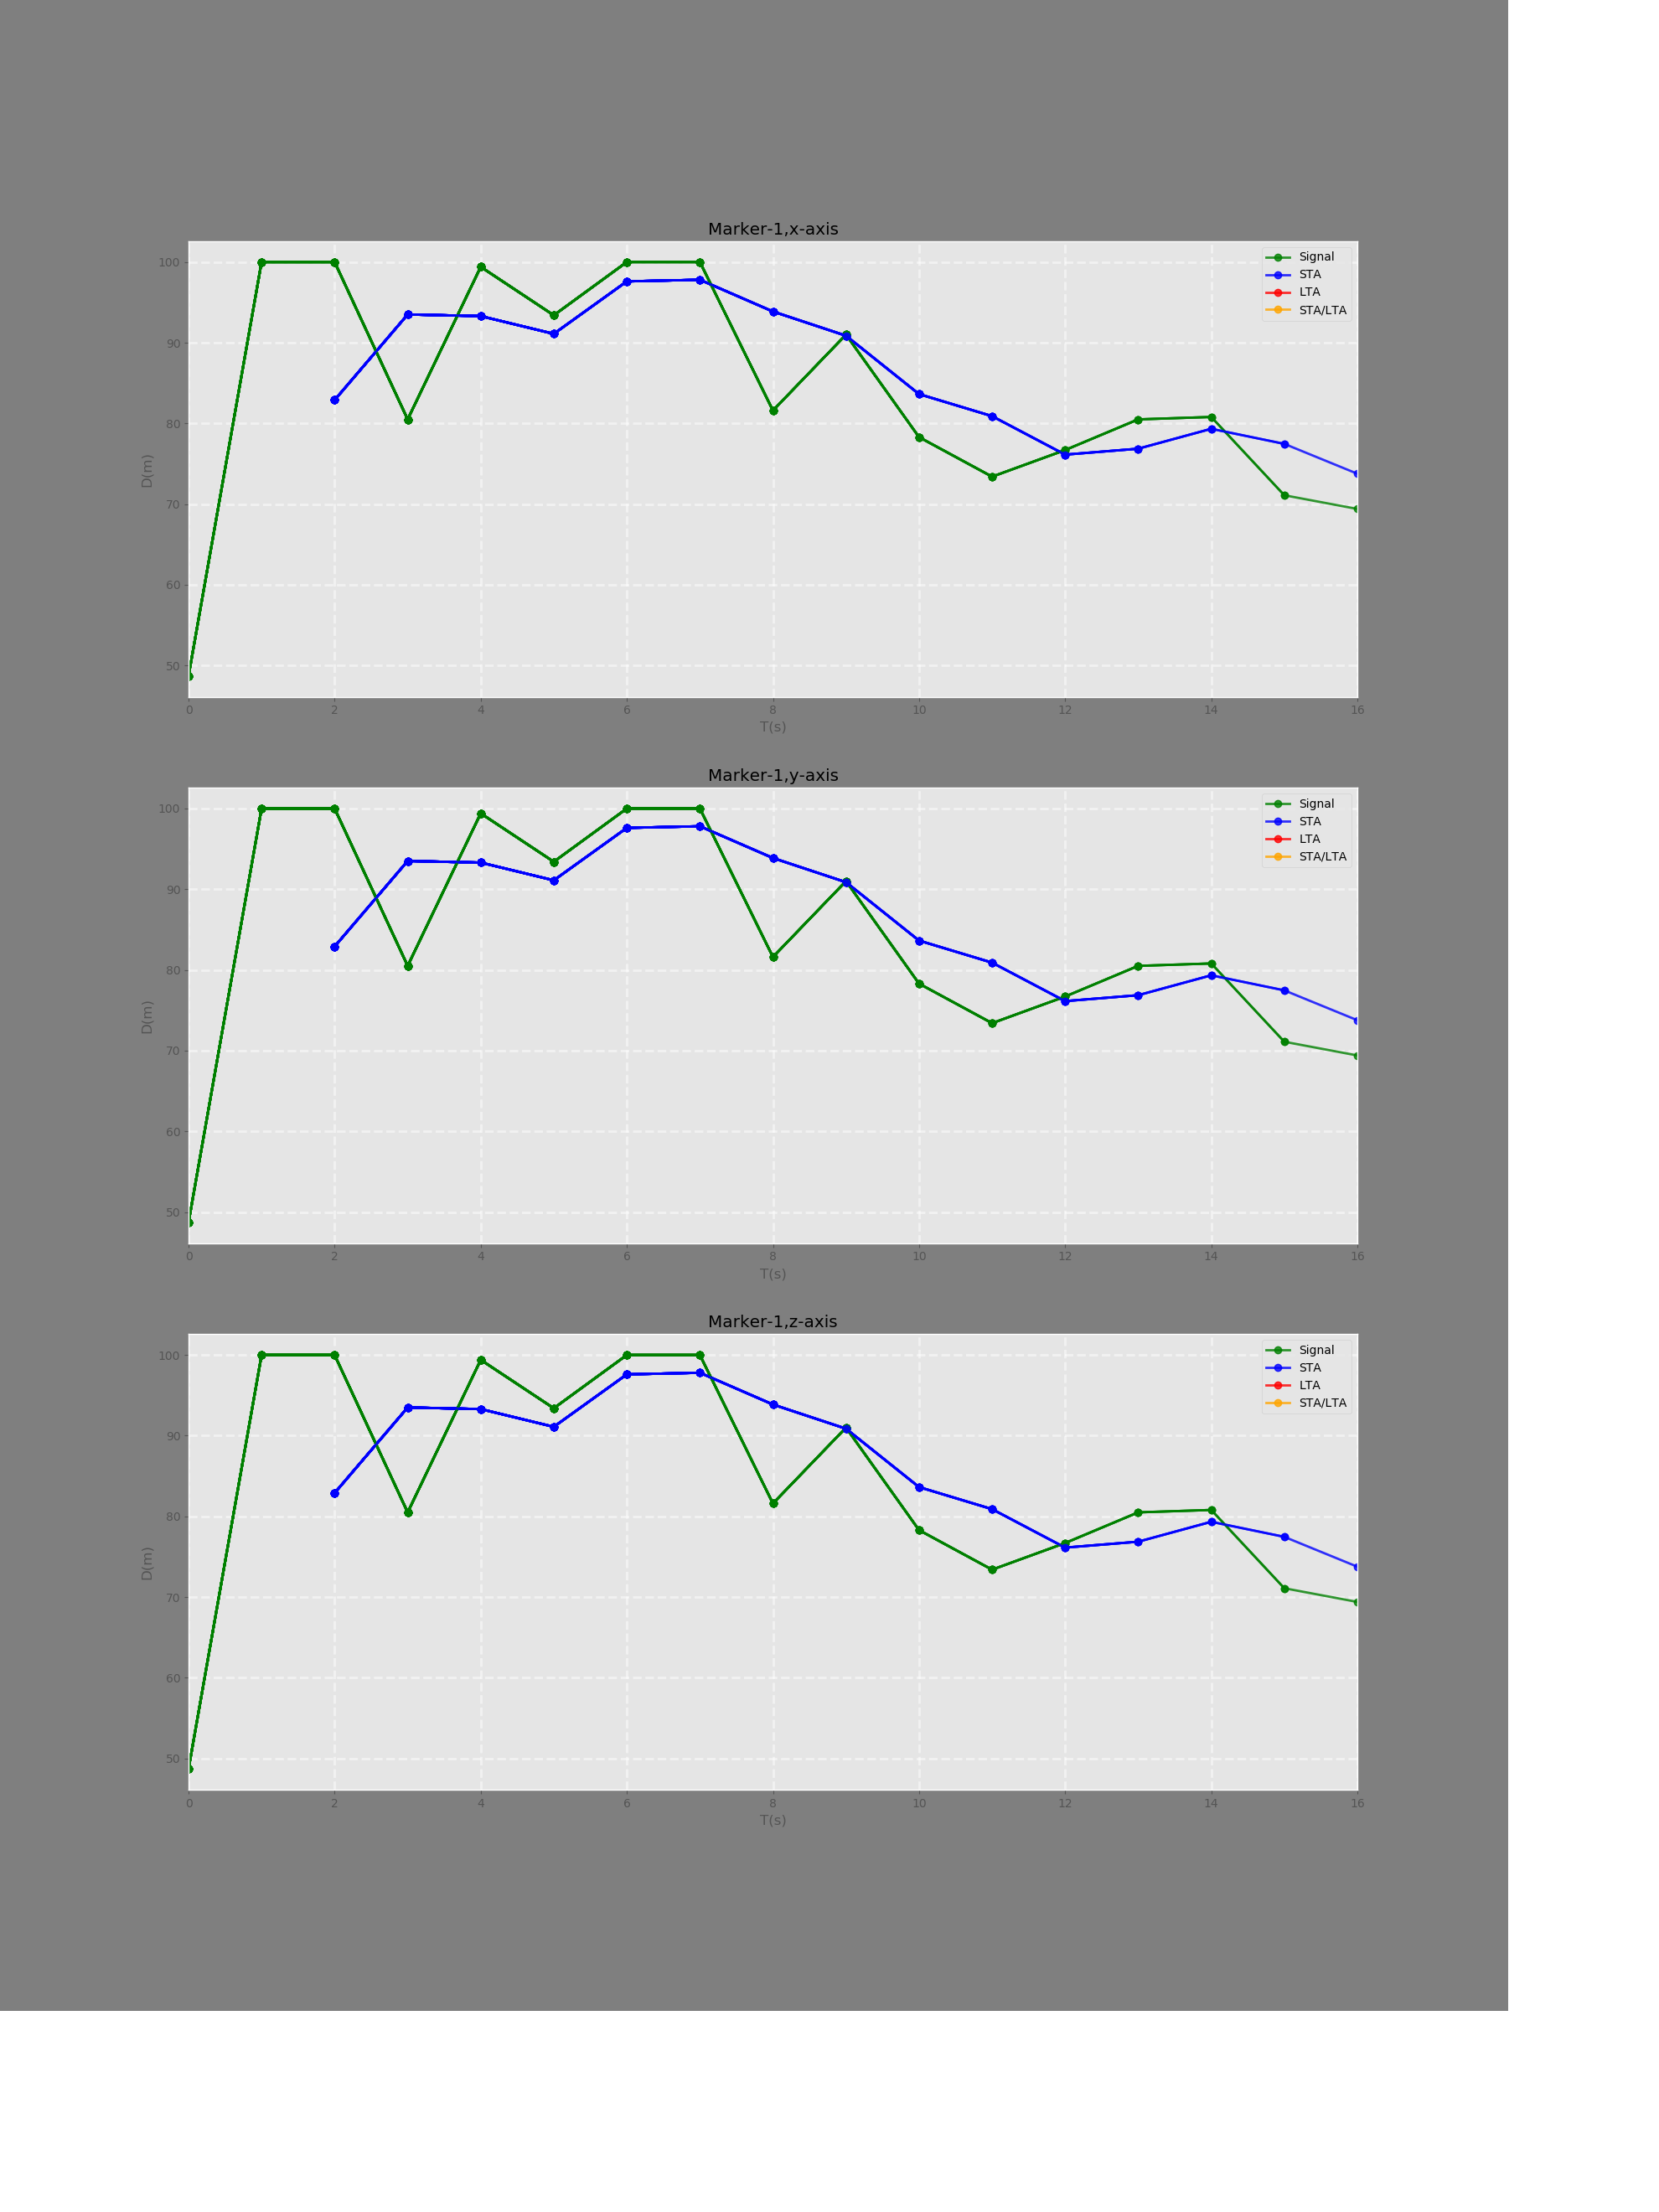

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:943: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:982: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1020: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0


acceleration 5129.999999999998


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


acceleration 5129.999999999998
acceleration 1950.0
acceleration 59.99999999999943
acceleration 1290.0000000000005
acceleration 59.99999999999943
acceleration 659.9999999999994
acceleration 1840.0000000000005
acceleration 900.0
acceleration 329.9999999999997
acceleration 780.0000000000011
acceleration 159.99999999999943
acceleration 50.0
acceleration 350.0
acceleration 940.0000000000006
acceleration 800.0000000000014
acceleration 19.999999999998863


KeyboardInterrupt: 

In [58]:
###     Start Your Experiment here

arduino_out = input("Is the arduino connected? type \"yes\" or \"no\"  \n")
# Arduino(arduino_out)
if arduino_out=="yes": 
    print("Arduio is connected")
elif arduino_out=="no":
    print("Arduio is not connected")
#input subjet name
global subject
subject = input("Enter Name of Subject\n")
#input Trial name
global trial
trial = input("Enter Trial Name\n")
# An input is requested and stored in a variable
test_text = input("Enter the number of sensors: ")
# Converts the string into a integer.
n = int(test_text)
# Prints in the console the variable as requested
print ("The number of sensors you entered is: ", n)
interf()
sensors(n,arduino_out)
# Window.mainloop()

<IPython.core.display.Javascript object>


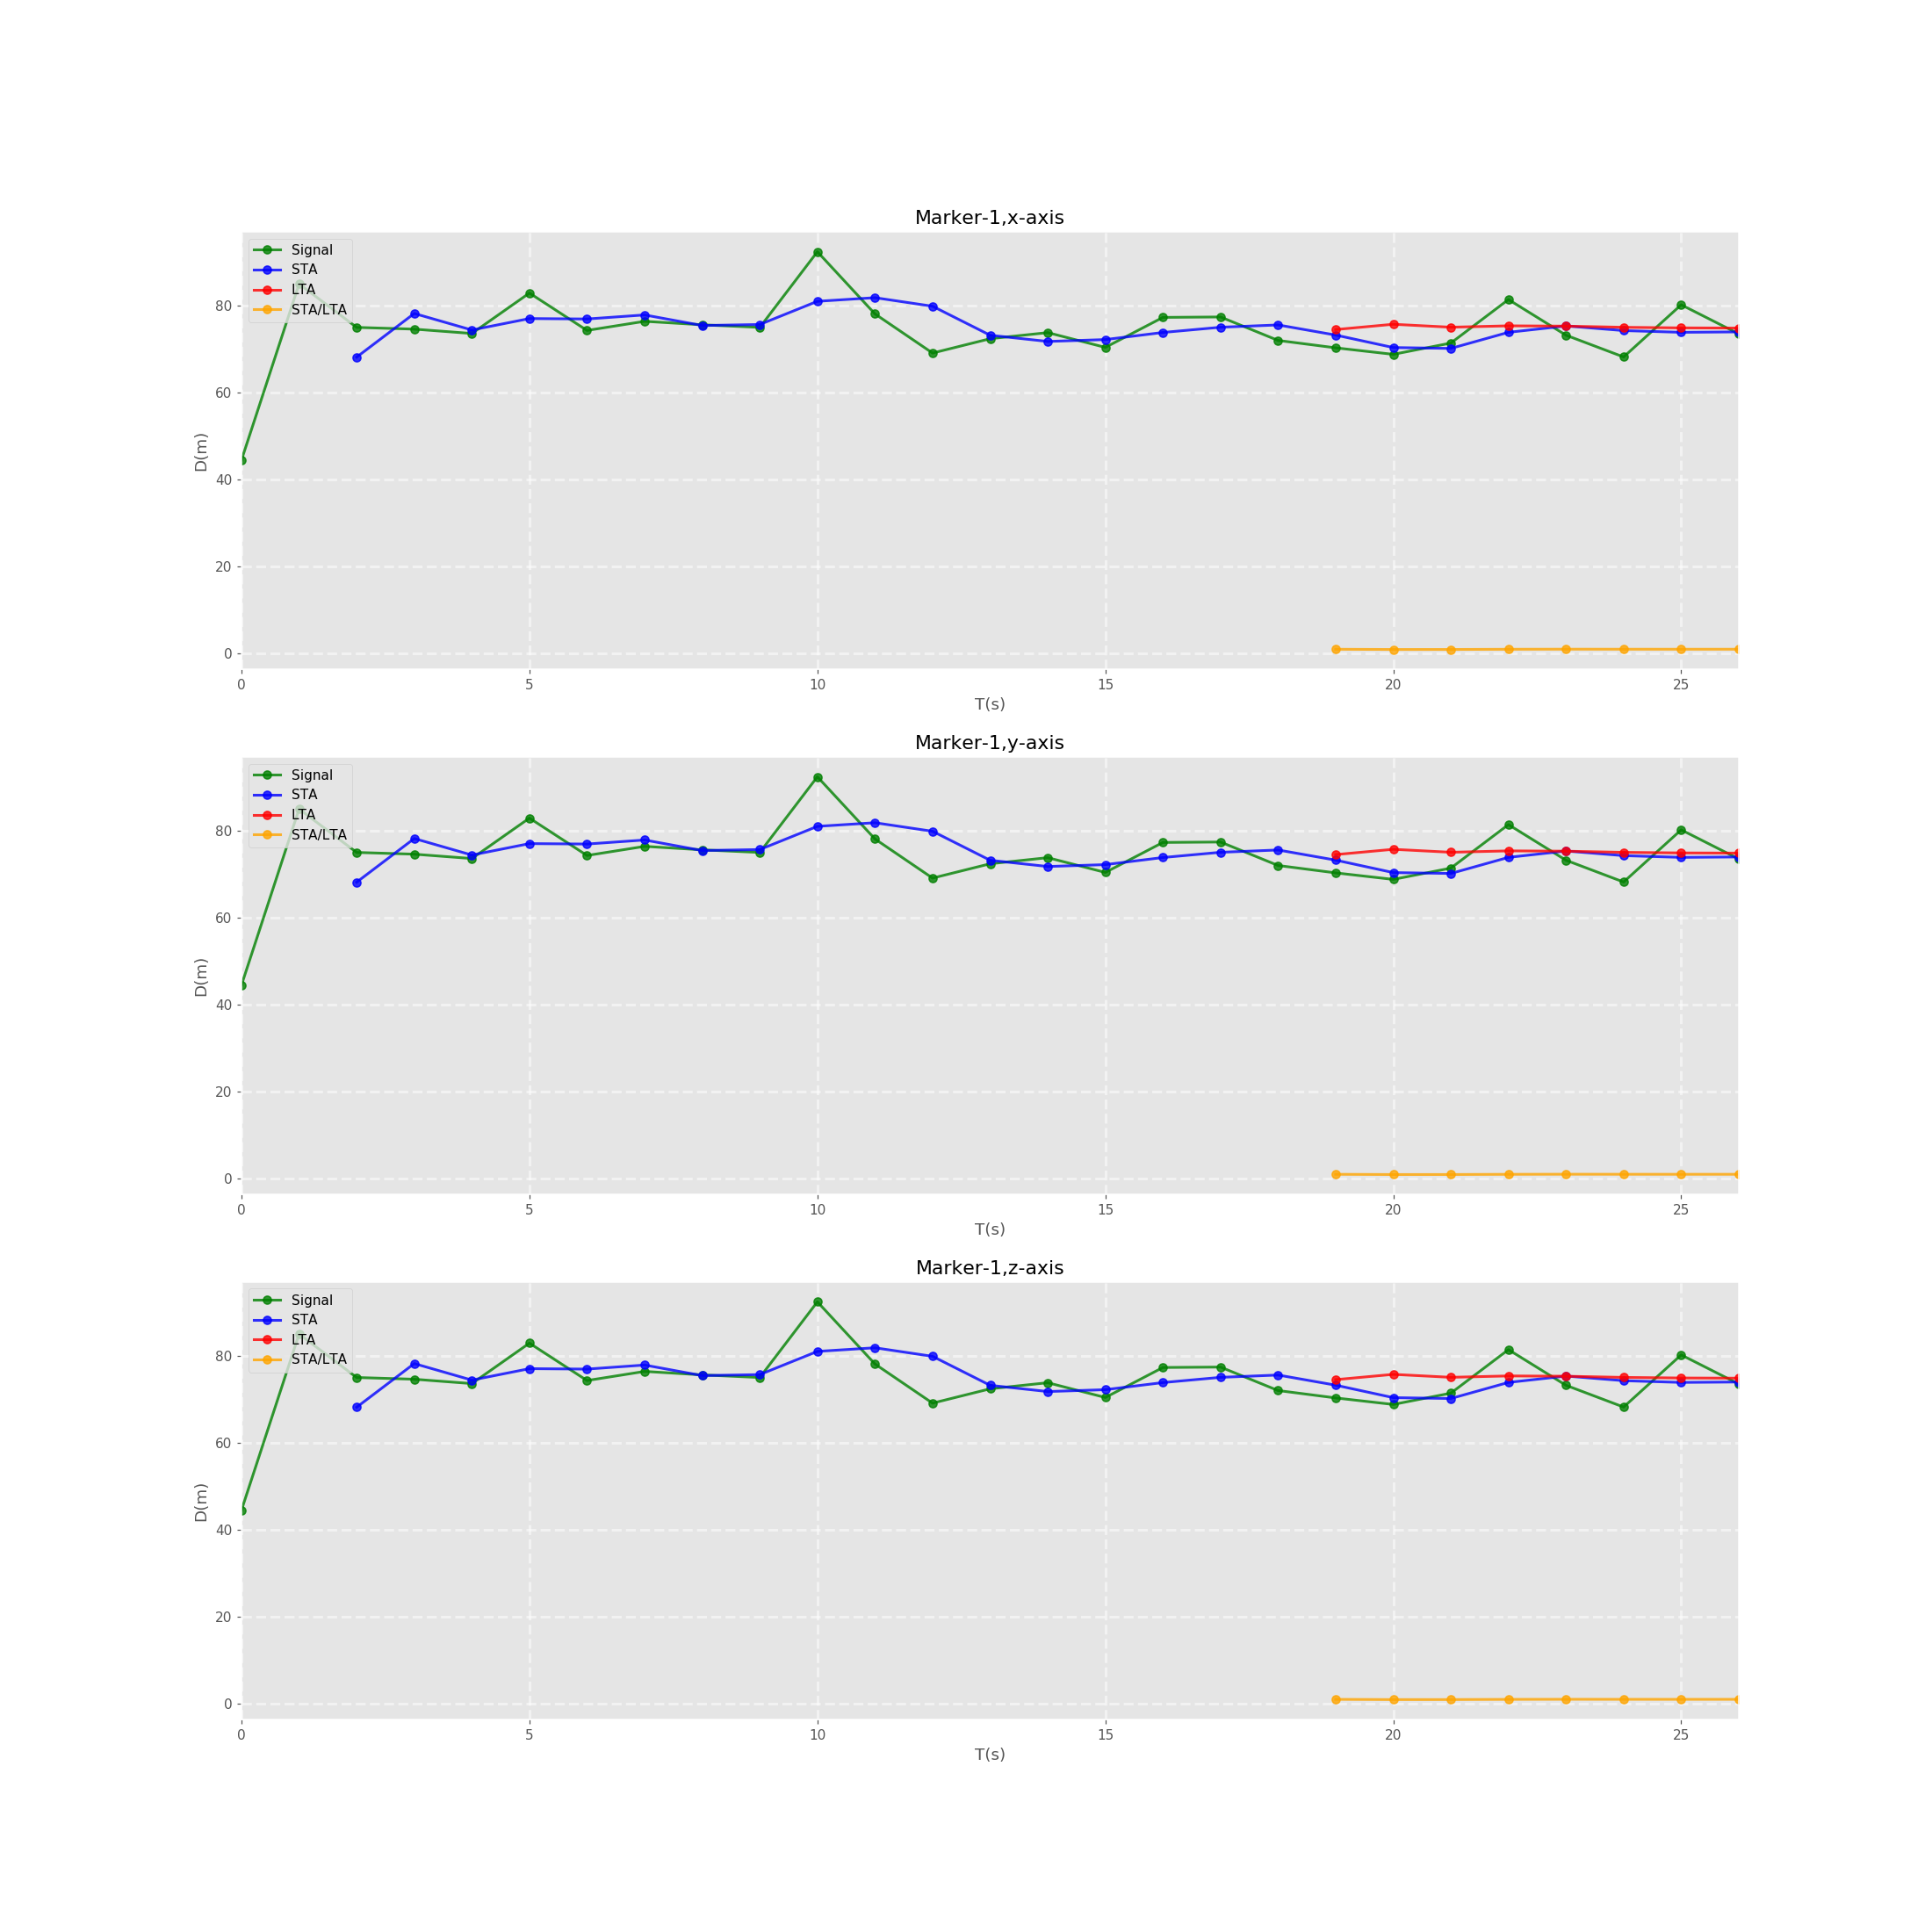

In [26]:
#Plot a Static Chart
static_plot(n)

Enter Trigger Threhold value: 0.4
The Trigger Threshold value you entered is:  0.4


<IPython.core.display.Javascript object>


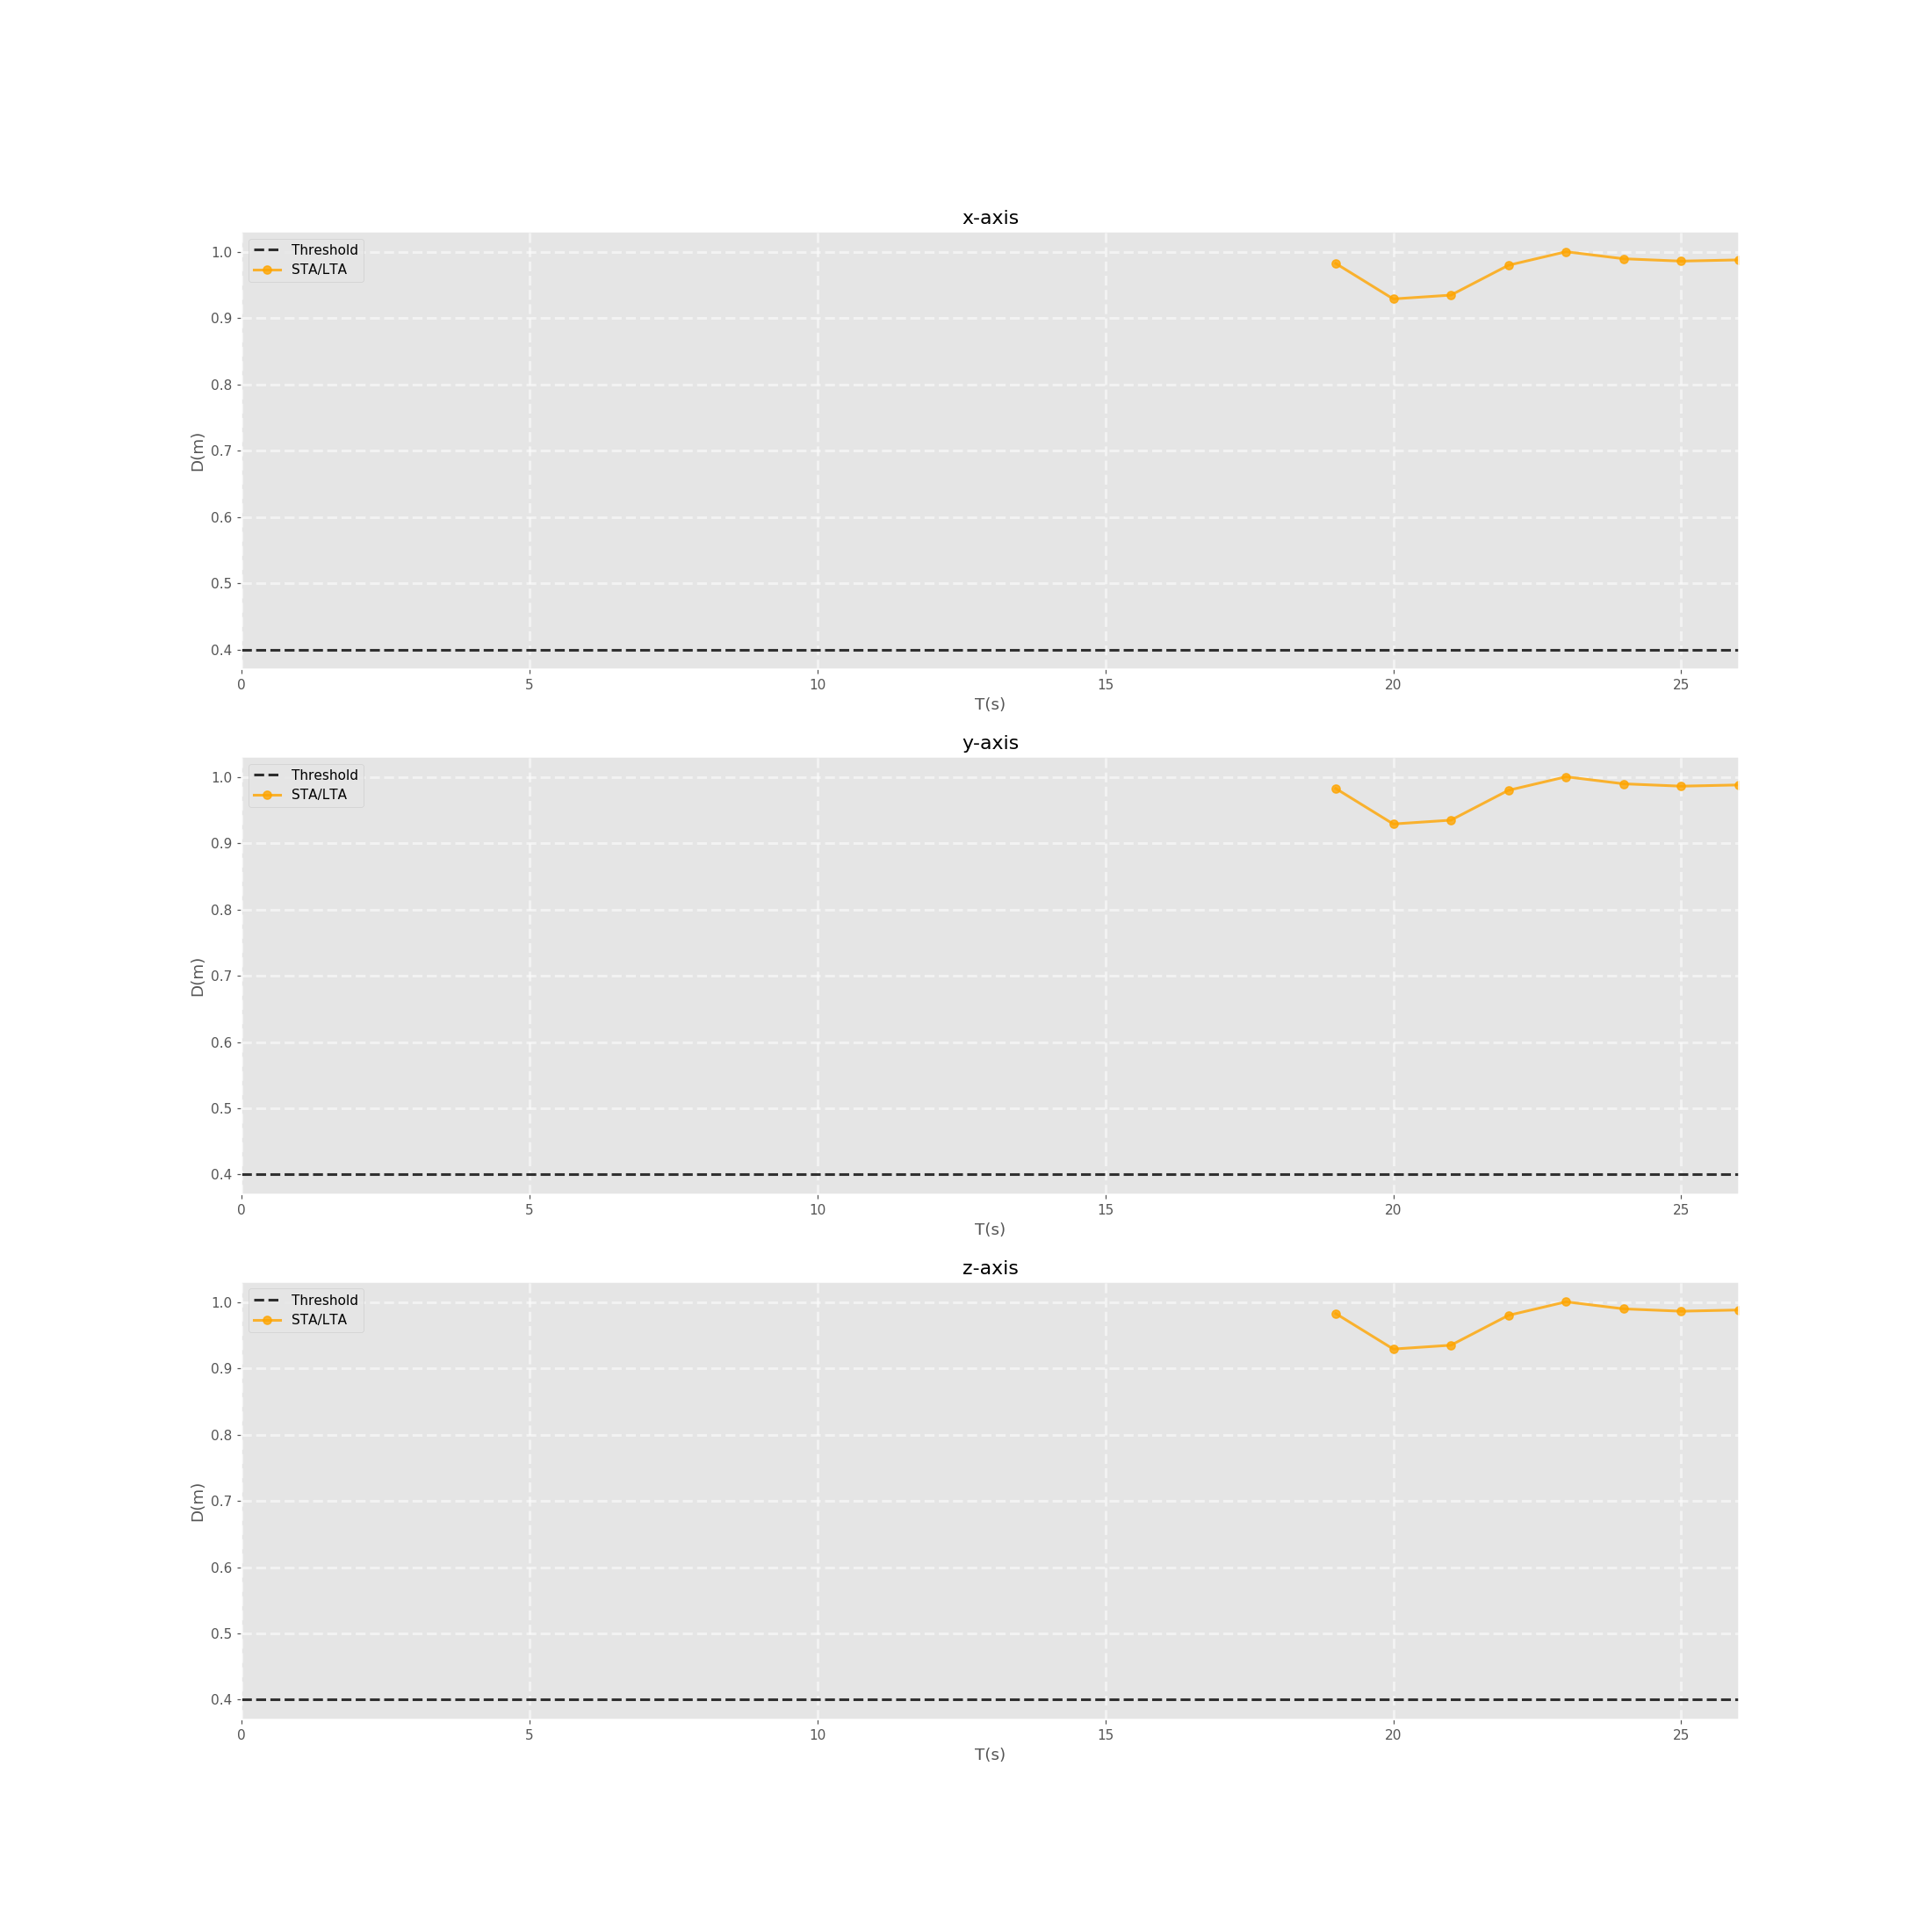

In [27]:
#Plot the Trigger data with STA/LTA 

test_threshold = input("Enter Trigger Threhold value: ")
print("The Trigger Threshold value you entered is: ",test_threshold)
threshold=float(test_threshold)
# sensors(n)
# static_plot(n)
# threshold_plot1(n)
threshold_plot1(n)

In [19]:
##Description of the data
# expo_csv = cols_a.describe().T
# print(expo_csv)

In [31]:
#Add Trial Name and Trial Subject to datasheet
# def exc():
global cols_a
# global trial
new_pos = []
new_subject = []
new_trial = []
for i in range(len(cols_a.index)):
    new_pos.append(pos)
    new_subject.append(subject)
    new_trial.append(trial)
    #new_pos.append(pos)
    
new_pos = pd.DataFrame(new_pos)
new_pos.columns = ['Target Location']
cols_a = pd.concat([new_pos,cols_a],axis=1)

new_trial = pd.DataFrame(new_trial)
new_trial.columns = ['Trial']
cols_a = pd.concat([new_trial,cols_a],axis=1)

new_subject = pd.DataFrame(new_subject)
new_subject.columns = ['Subject']
cols_a = pd.concat([new_subject,cols_a],axis=1)

cols_a.index.name = 'DataFrame'
print("Trial Data:",trial,'\n',cols_a)
#expo_csv = cols_a.describe().T
# print(expo_csv)
#cols_a.to_csv("spread_sheet.csv")


#Save this Trial Dataset
save_data = input("Would you like to save this Trial in your csv, \"yes\" or \"no\"?\n")
if save_data=="yes":
    #trial
    #saving the data
    filename = trial+'.pkl'
    pd.to_pickle(cols_a, filename)
    ##loading the data
    #filename = pd.read_pickle('cols_a.pkl')

#Initialize pd dataframe()
create_data = input("Initialize new CSV file (all Trial data would reset), \"yes\" or \"no\"?\n")
if create_data=="yes":
    main_data=pd.DataFrame()
#     new_data()
#Append Trialdata to main_data
add_data = input("Add the data in your csv, \"yes\" or \"no\"?\n")
if add_data=="yes":
    #loading the data
    load_data = pd.read_pickle(filename)
    main_data = main_data.append(load_data)
# #Tesing main_data
# shape(main_data)

Trial Data: T1 
           Subject Trial Target Location Subject Trial Target Location Subject  \
DataFrame                                                                       
0            P105    T1     upper-right    P105    T1     upper-right    P105   
1            P105    T1     upper-right    P105    T1     upper-right    P105   
2            P105    T1     upper-right    P105    T1     upper-right    P105   
3            P105    T1     upper-right    P105    T1     upper-right    P105   
4            P105    T1     upper-right    P105    T1     upper-right    P105   
5            P105    T1     upper-right    P105    T1     upper-right    P105   
6            P105    T1     upper-right    P105    T1     upper-right    P105   
7            P105    T1     upper-right    P105    T1     upper-right    P105   
8            P105    T1     upper-right    P105    T1     upper-right    P105   
9            P105    T1     upper-right    P105    T1     upper-right    P105   
10         

In [32]:
#After all the Trial take place, Only then Run this Cell
#Save this CSV file
create_csv = input("Save all the Trial Data in csv, \"yes\" or \"no\"?\n")
if create_csv=="yes":
    csv_name = input("Enter name of csv file \n")
    #create spreadsheet
    csv_name = csv_name+'.csv'
    main_data.to_csv(csv_name)

Save all the Trial Data in csv, "yes" or "no"?
yes
Enter name of csv file 
T101


In [33]:
#Testing
main_data

,Subject,Trial,Target Location,Subject,Trial,Target Location,Subject,Trial,Target Location,Subject,Trial,Target Location,Marker1-Xaxis,Marker1-Yaxis,Marker1-Zaxis
DataFrame,,,,,,,,,,,,,,,
0,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,44.5,44.5,44.5
1,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,85.0,85.0,85.0
2,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,75.0,75.0,75.0
3,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,74.6,74.6,74.6
4,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,73.6,73.6,73.6
5,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,82.9,82.9,82.9
6,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,74.3,74.3,74.3
7,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,76.4,76.4,76.4
8,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,P105,T1,upper-right,75.6,75.6,75.6
